In [112]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [113]:
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)

In [114]:
datos = pd.read_csv('D:/bsaan/OneDrive - Universidad Nacional Abierta y a Distancia/universidad/Septimo semestre/Analisis de datos/actividad 3/solucion/regresion logistica/heart_cleveland_upload - original.csv')

In [115]:
# Visualizar las primeras filas del dataset
print(datos.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [116]:
# Obtener información sobre el dataset
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


In [117]:
# Resumen estadístico de los datos
print(datos.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

In [103]:
# Paso 2: Preprocesamiento de datos
# Identificar valores faltantes
print(datos.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [104]:
# Dado que no se encontraron valores faltantes en los datos, no es necesario realizar imputación de datos.
# La eliminación de filas con valores faltantes (datos = datos.dropna()) no es aplicable en este caso.

In [110]:
print(datos.dtypes)

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object


In [107]:
# Calcular la media y la desviación estándar de los datos
mean = datos.mean()
std = datos.std()

# Calcular los límites de los datos atípicos
outlier_threshold = 3
lower_bound = mean - outlier_threshold * std
upper_bound = mean + outlier_threshold * std

# Encontrar los índices de las filas que contienen datos atípicos
outlier_indices = []
for column in datos.columns:
    outlier_indices.extend(datos[(datos[column] < lower_bound[column]) | (datos[column] > upper_bound[column])].index)

# Eliminar los índices duplicados
outlier_indices = list(set(outlier_indices))

# Crear un nuevo DataFrame con los datos atípicos
outliers = datos.loc[outlier_indices]

# Visualizar los datos atípicos
print("Datos atípicos:")
print(outliers)

Datos atípicos:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   67    1   3       120   237    0        0       71      0      1.0   
234   56    0   3       200   288    1        2      133      1      4.0   
45    54    1   1       192   283    0        2      195      0      0.0   
238   56    0   3       134   409    0        2      150      1      1.9   
79    67    0   2       115   564    0        2      160      0      1.6   
239   55    1   3       140   217    0        0      111      1      5.6   
83    65    0   2       140   417    1        2      157      0      0.8   
180   63    0   3       150   407    0        2      154      0      4.0   
186   62    0   3       160   164    0        2      145      0      6.2   

     slope  ca  thal  condition  
164      1   0     0          1  
234      2   2     2          1  
45       0   1     2          1  
238      1   2     2          1  
79       1   0     2          0  
239      2   0     

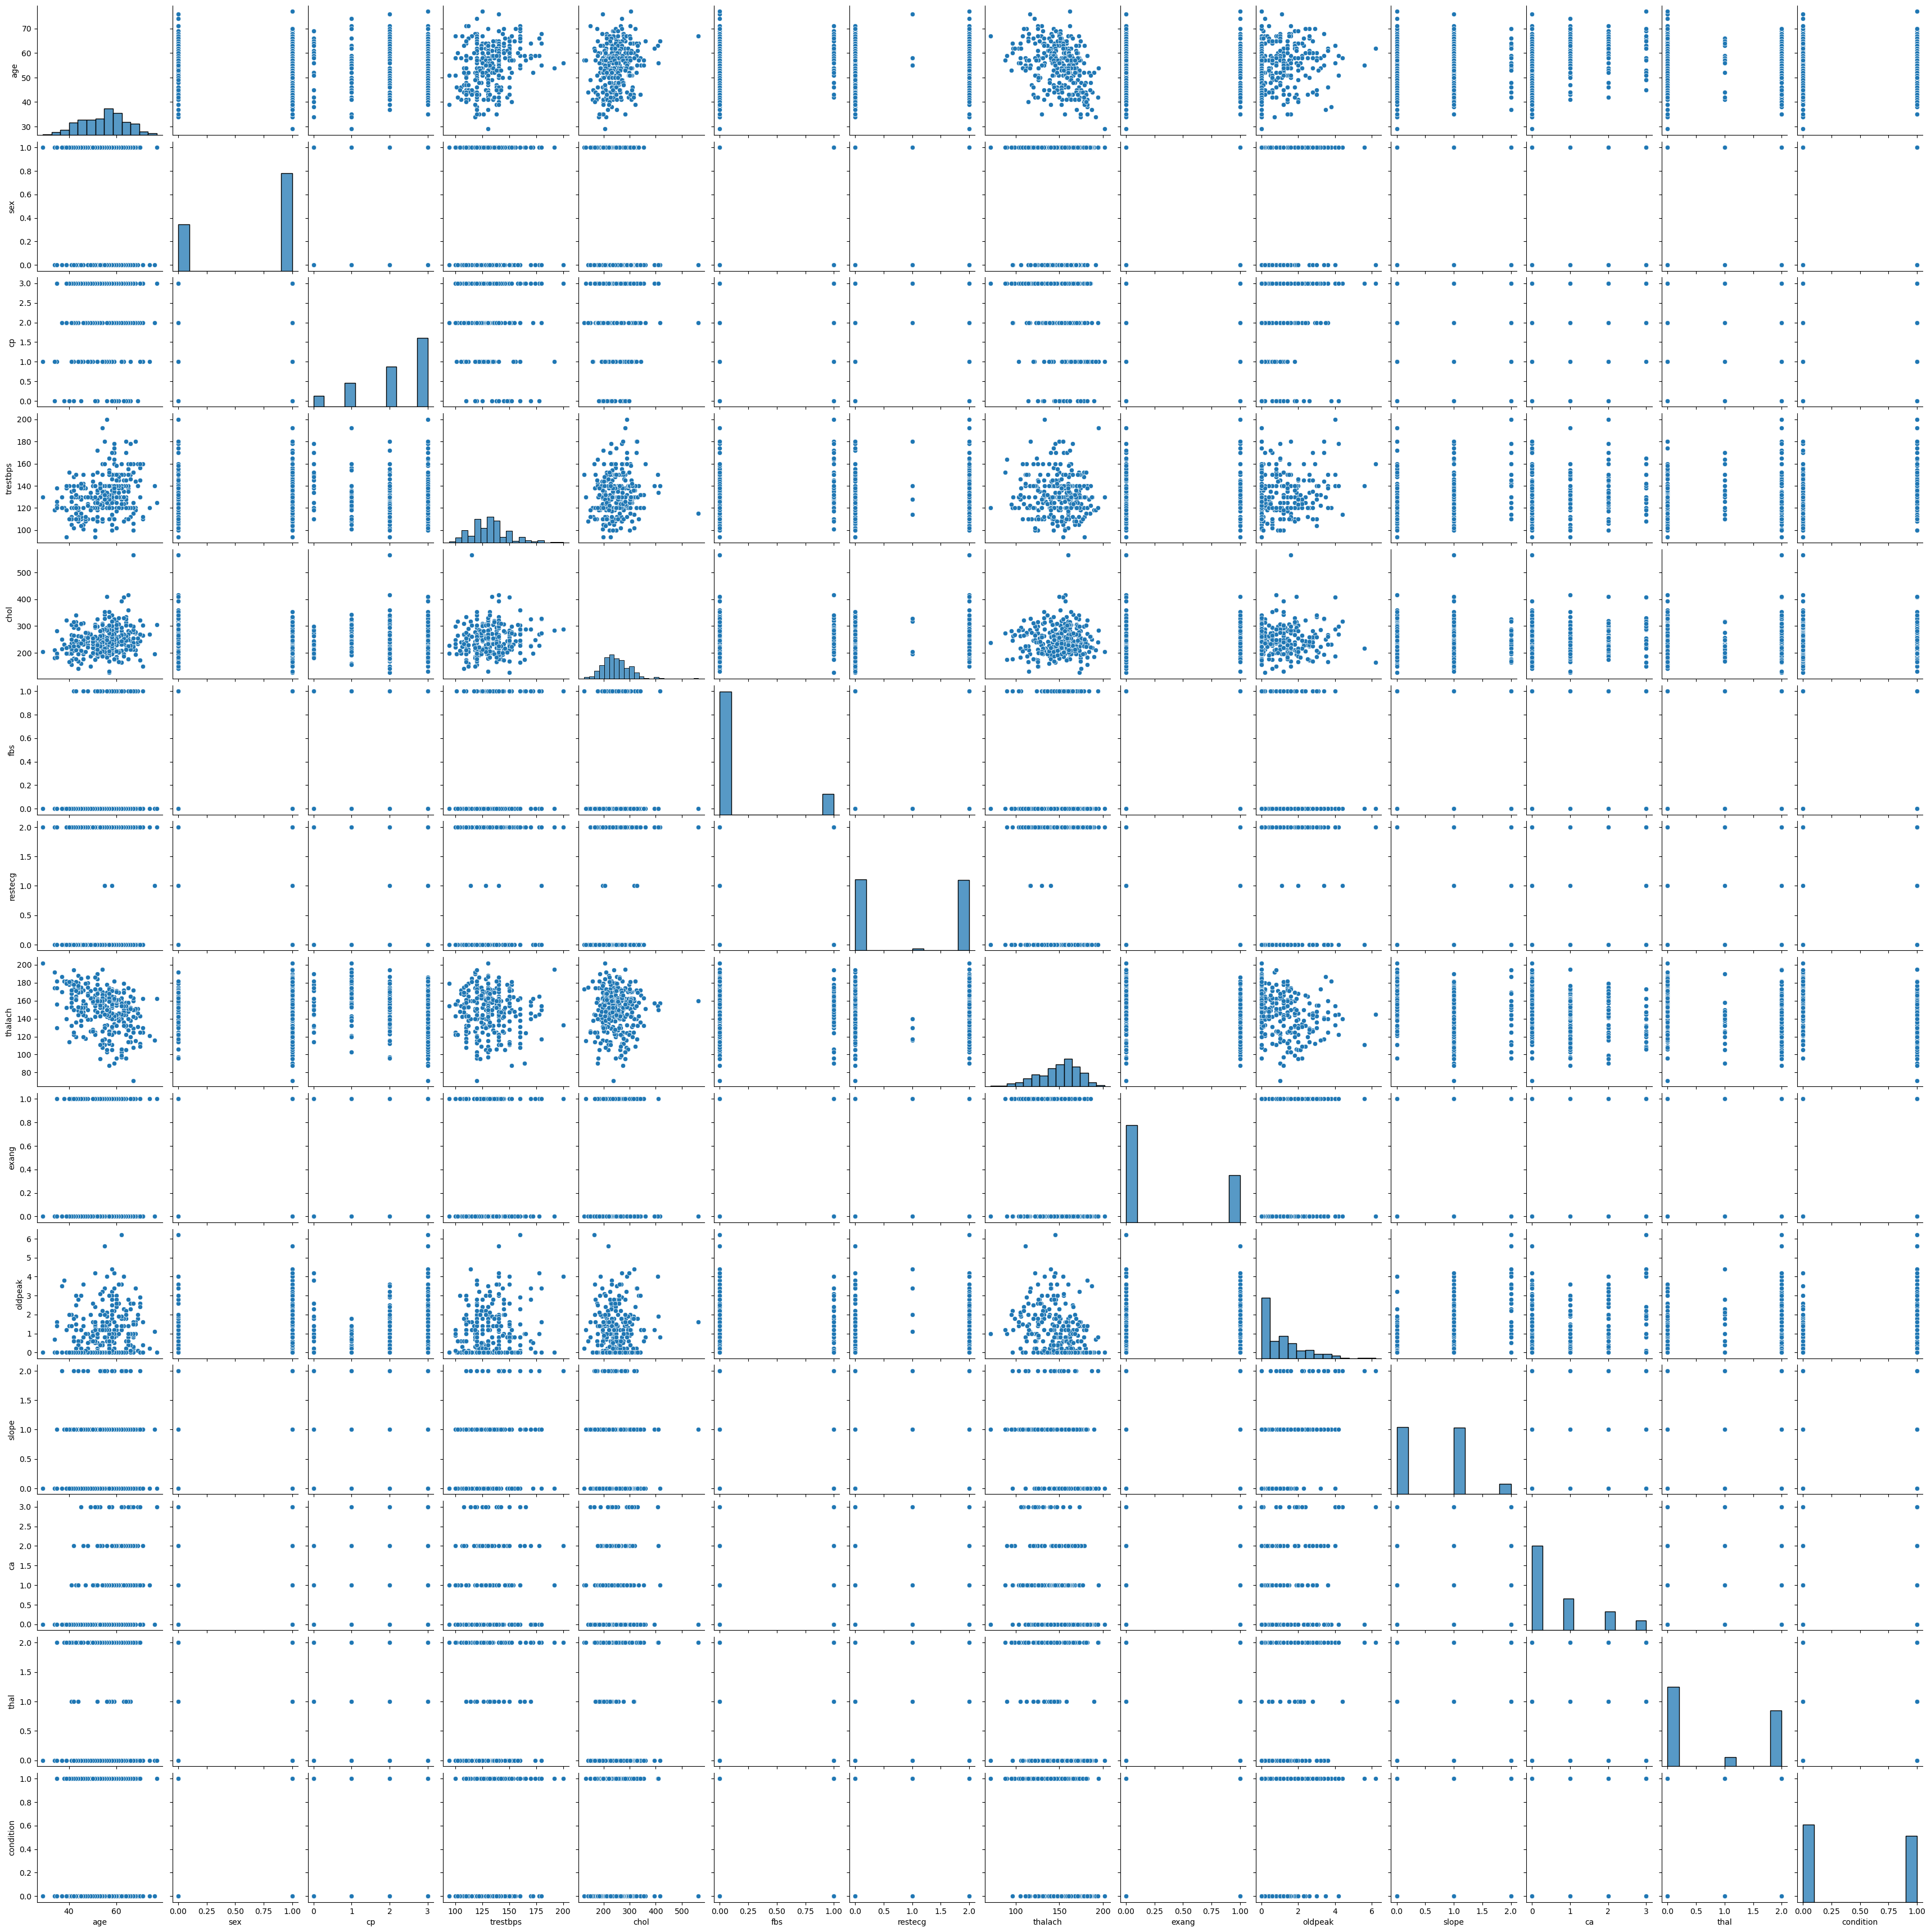

In [96]:
# Visualizar relaciones entre variables
sns.pairplot(datos)
plt.show()

In [60]:
# Paso 3: Seleccionar características relevantes
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca']
X = datos[features]
y = datos['condition']

In [61]:
# Paso 4: División del dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)  # Aumenta el número máximo de iteraciones
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [87]:
# Paso 5: # Predecir en el conjunto de prueba, calcular probabilidades de predicción en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [86]:
# Paso 6: Evaluar el modelo, Evaluar el desempeño del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Exactitud:", accuracy)
print("Matrix de Confusion :\n", conf_matrix)
print("Reporte de Classificación:\n", class_report)

Accuracy: 0.75
Confusion Matrix:
 [[24  8]
 [ 7 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76        32
           1       0.72      0.75      0.74        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



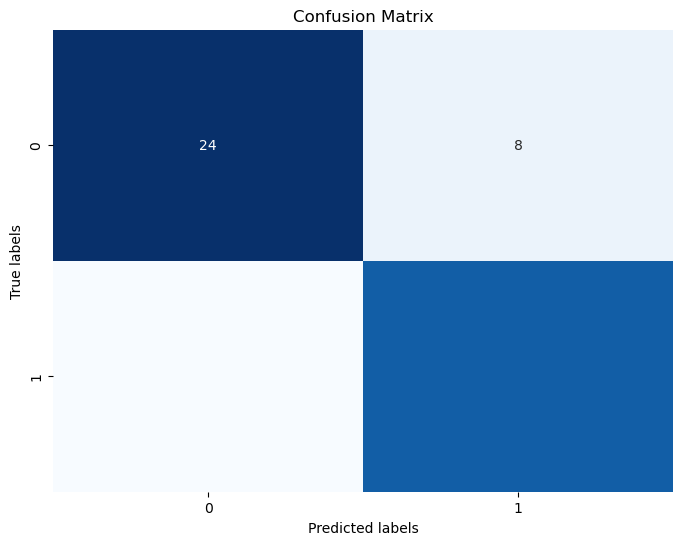

In [78]:
# Paso 7: Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

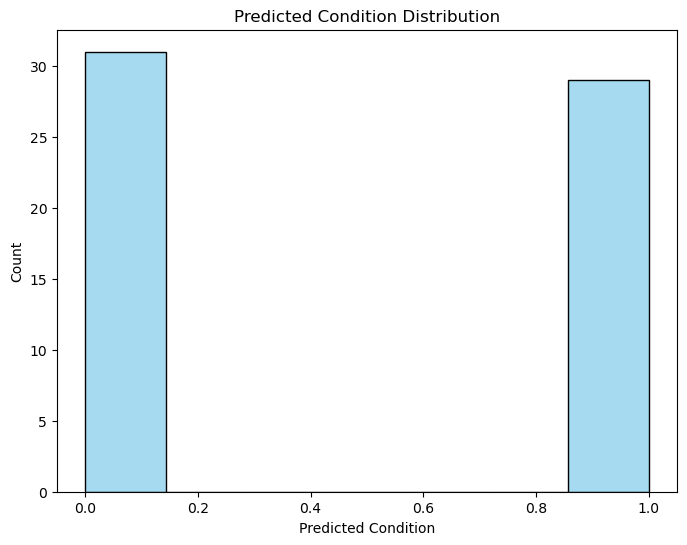

In [79]:
# Paso 7: Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

# Graficar la distribución de las predicciones
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, kde=False, color='skyblue')
plt.xlabel('Predicted Condition')
plt.ylabel('Count')
plt.title('Predicted Condition Distribution')
plt.show()

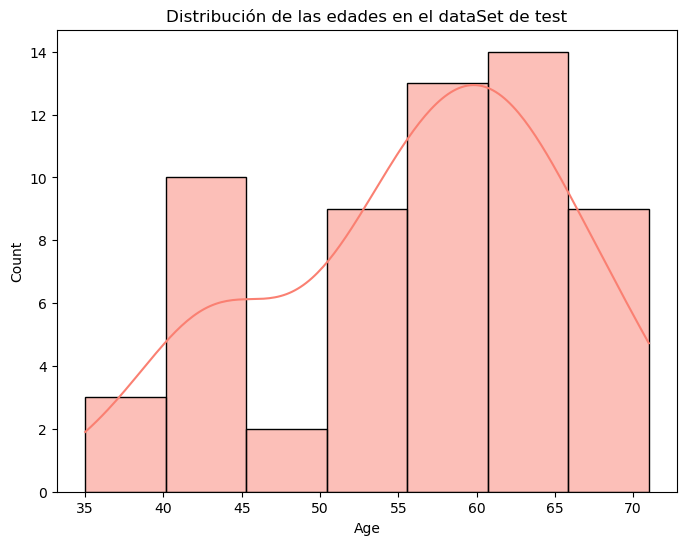

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76        32
           1       0.72      0.75      0.74        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



In [88]:
# Paso 7: Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

# Graficar la distribución de las edades de los pacientes en el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.histplot(datos.loc[y_test.index, 'age'], kde=True, color='salmon')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribución de las edades en el dataSet de test')
plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

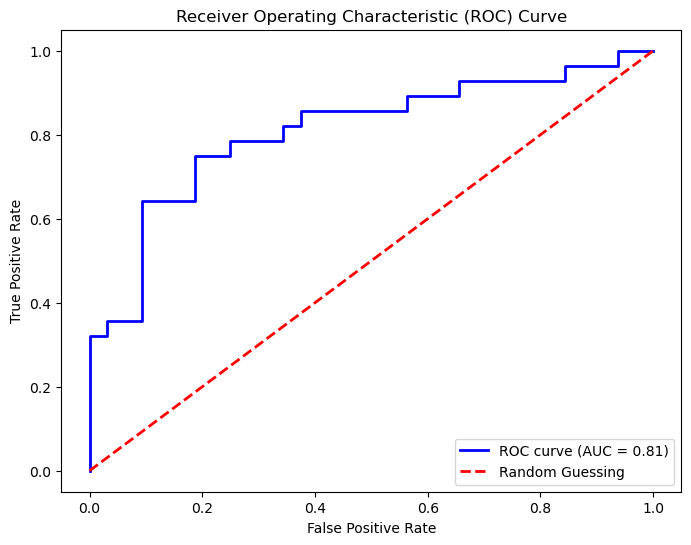

AUC Score: 0.8102678571428571


In [84]:
# Paso 7: Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

#de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('Falsos negativos Rate')
plt.ylabel('Verdaderos positivos')
plt.title('Curva de característica operativa del receptor (ROC)')
plt.legend(loc='lower right')
plt.show()

# Imprimir el área bajo la curva ROC (AUC)
print("AUC Score:", auc)